# Teradata - Python: Update the database

## Connect to Teradata

In [1]:
import teradata
import pandas as pd

#Define application
udaExec = teradata.UdaExec (appName="TestAPP", version="1.0",
        logConsole=False)

#Open ODBC connection (the teradata dsn has to be setup in the local ODBC Administrator)
session = udaExec.connect(method="odbc", dsn="teradata",
        username="dbc", password="dbc")

## Call stored procedure

#Call stored procedure
```temperature = 6
humidity = 6
proc_string = "CALL tdata_db_000.Weather_Log_Create({0}, {1})".format(temperature, humidity)

cursor =  session.cursor()
cursor.execute(proc_string);```


In [2]:
#Add a query to a dataframe
query ="SELECT * FROM tdata_db_000.Weather_Log ORDER BY Log_Id DESC"
df = pd.read_sql(query,session)

#View data
df.head(10)

,Log_Id,Date_Time,Temperature,Humidity,Image_Blob,Cloud_Type
0,20.0,2018-07-18 09:10:04.760,25.000,6.0,None,None
1,19.0,2018-07-18 09:10:03.710,25.000,6.0,None,None
2,18.0,2018-07-18 09:10:02.770,25.000,6.0,None,None
3,17.0,2018-07-18 09:10:01.830,25.000,6.0,None,None
4,16.0,2018-07-18 09:10:00.670,25.000,6.0,None,None
5,15.0,2018-07-18 09:09:59.640,24.937,6.0,None,None
6,14.0,2018-07-18 09:09:58.690,24.937,6.0,None,None
7,13.0,2018-07-18 09:09:57.550,24.937,6.0,None,None
8,12.0,2018-07-18 09:09:56.500,24.937,6.0,None,None
9,11.0,2018-07-18 09:09:55.460,24.937,6.0,None,None


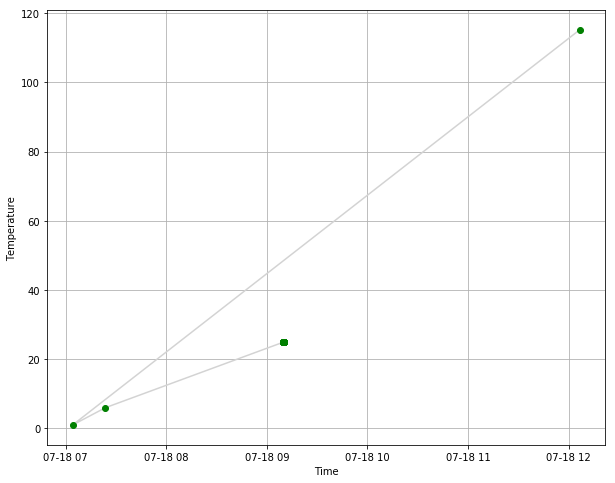

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

# Set up the graph

plt.figure(figsize = (10,8))

# Plot the function
plt.plot(df.Date_Time,df.Temperature, color='lightgrey', marker='o', markeredgecolor='green', markerfacecolor='green')

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid()
#fig = plt.figure()
#fig.set_size_inches(18.5, 10.5)

plt.show()

# Appendix A: Data structures

## Create the Weather_Log table

``` mysql
--DROP TABLE
DROP TABLE tddb_00.Weather_Log;

--CREATE TABLE
CREATE TABLE tddb_00.Weather_Log
    (Log_Id INT NOT NULL GENERATED ALWAYS AS IDENTITY
           (START WITH 1 
            INCREMENT BY 1 
            MINVALUE 1 
            MAXVALUE 2147483647 
            NO CYCLE),
     Date_Time TIMESTAMP,
     Temperature FLOAT,
     Humidity FLOAT,
     Image_Blob VARCHAR(100),
     Cloud_Type VARCHAR(50)
    )
	UNIQUE PRIMARY INDEX(Log_Id);
```

## Test the Table by inserting a row of data

``` mysql
--INSERT ROW DIRECTLY
 INSERT INTO tddb_00.Weather_Log
 (
 	Date_Time
 	, Temperature
 	, Humidity
 	, Image_Blob
 	, Cloud_Type
 )
 VALUES
 (
 	CURRENT_TIMESTAMP AT TIME ZONE 'Africa Egypt'
 	, 0
 	, 0
 	, NULL
 	, NULL
 );	
```

## Create a Stored Procedure

### If no procedure has ever been created by the current user: Grant access to created procedures

``` mysql
--GRANT PROCEDURE PERMISSIONS
GRANT CREATE PROCEDURE ON "tddb_00" TO "DBC" WITH GRANT OPTION;
```

``` mysql
--CREATE PROCEDURE TO LOG DATA
CREATE PROCEDURE tddb_00.Weather_Log_Create(                       
                        IN iTemperature FLOAT,
                        IN iHumidity FLOAT
                        )
BEGIN
	
	 INSERT INTO tddb_00.Weather_Log
	 (
	 	Date_Time
	 	, Temperature
	 	, Humidity
	 	, Image_Blob
	 	, Cloud_Type
	 )
	 VALUES
	 (
	 	CURRENT_TIMESTAMP AT TIME ZONE 'Africa Egypt'
	 	, iTemperature
	 	, iHumidity
	 	, NULL
	 	, NULL
	 );
	 
END; 
```

## Test the SQL

``` mysql
--CALL PROCEDURE
CALL tddb_00.Weather_Log_Create(1, 1);

--SELECT FROM TABLE
SELECT * 
FROM tddb_00.Weather_Log
ORDER BY Log_Id DESC;
```